<h1>R 스스로 해보기 6</h1>
<hr>

<h4>1. R 기본 데이터에 사료의 종류에 따른 병아리의 무게에 대한 데이터 chickwts가 있다. 아래
와 같이 데이터 chickwts에 대한 정보를 출력하는 코드를 쓰시오</h4>

In [1]:
help(chickwts)

chickwts {datasets},R Documentation


<hr>
<h4>2. 데이터프레임 chickwts의 구조(str) 출력하는 코드 작성</h4>

In [2]:
str(chickwts)

'data.frame':	71 obs. of  2 variables:
 $ weight: num  179 160 136 227 217 168 108 124 143 140 ...
 $ feed  : Factor w/ 6 levels "casein","horsebean",..: 2 2 2 2 2 2 2 2 2 2 ...


<hr>
<h4>3. 아래와 같이 데이터프레임의 두 변수 weight와 feed의 요약 통계량을 출력하는 코드 작성</h4>

In [3]:
summary(chickwts)

     weight             feed   
 Min.   :108.0   casein   :12  
 1st Qu.:204.5   horsebean:10  
 Median :258.0   linseed  :12  
 Mean   :261.3   meatmeal :11  
 3rd Qu.:323.5   soybean  :14  
 Max.   :423.0   sunflower:12  

<hr>
<h4>4. 데이터프레임 chickwts의 변수 feed의 빈도표를 구하여 변수 tbl에 저장하고, tbl의 내용
을 출력하는 코드 작성</h4>

In [4]:
tbl <- table(chickwts$feed)
tbl


   casein horsebean   linseed  meatmeal   soybean sunflower 
       12        10        12        11        14        12 

<hr>
<h4>5. 데이터프레임 chickwts의 변수 feed에 대하여 아래와 같이 막대그래프(barplot)을 그리는
코드 작성. 그래프의 제목은 “Feed Type”, x축의 제목은 “feed”, y축의 제목은 “빈도
수”, 막대의 색상은 gold, 막대의 테두리 색상은 blue</h4>

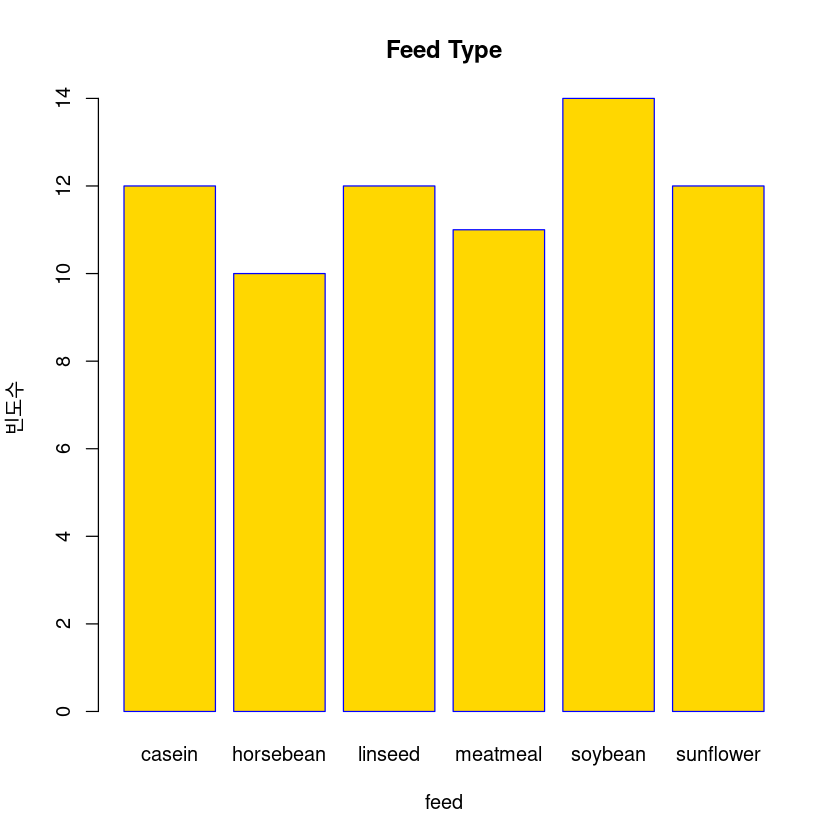

In [5]:
barplot(tbl, main = "Feed Type", xlab = "feed", ylab = "빈도수", col = "gold", border = "blue")


<hr>
<h4>6. 데이터프레임 chickwts의 변수 feed에 대하여 아래와 같이 ggplot의 막대그래프
(geom_bar)을 그리는 코드 작성.</h4>

In [6]:
library(ggplot2)

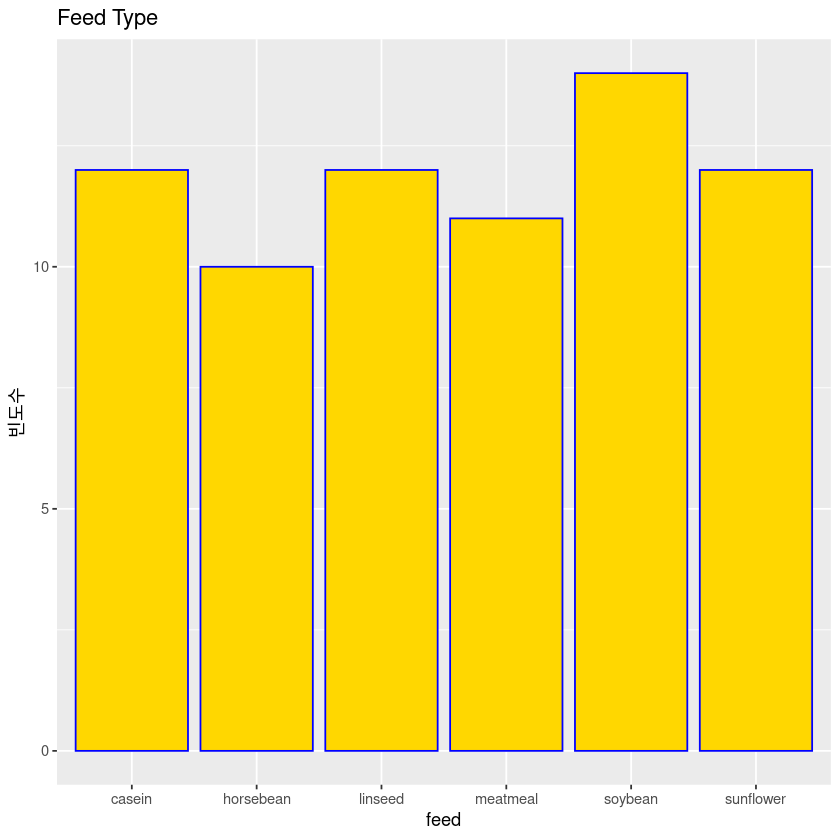

In [7]:
p <- ggplot(chickwts, aes(feed))

# a.막대의 색상은 gold, 막대의 테두리색상은 blue
p <- p + geom_bar(fill='gold', color='blue')

# b.그래프의 제목은 “Feed Type”, x축의제목은 “feed”, y축의 제목은 “빈도수” + labs(title=, x=, y=) 사용
p <- p + labs(title = "Feed Type", x = "feed", y = "빈도수")

p

<hr>
<h4>7. taaply()를 이용하여 데이터프레임 chickwts의 변수 feed에 따른 weight의 평균을 구하
여 result에 저장하고, result의 내용을 출력하는 코드 작성</h4>

In [8]:
result <- tapply(chickwts$weight, chickwts$feed, mean)

print(result)

   casein horsebean   linseed  meatmeal   soybean sunflower 
 323.5833  160.2000  218.7500  276.9091  246.4286  328.9167 


<hr>
<h4>8. 데이터프레임 chickwts의 변수 feed에 따른 weight의 평균을 높이로 하는 막대그래프
(barplot)을 그리는 코드 작성. 그래프의 제목은 “Weight By Feed Type”, x축의 제목
은 “feed”, y축의 제목은 “weight 평균”, 막대의 색상은 gold, 막대의 테두리 색상은
red</h4>

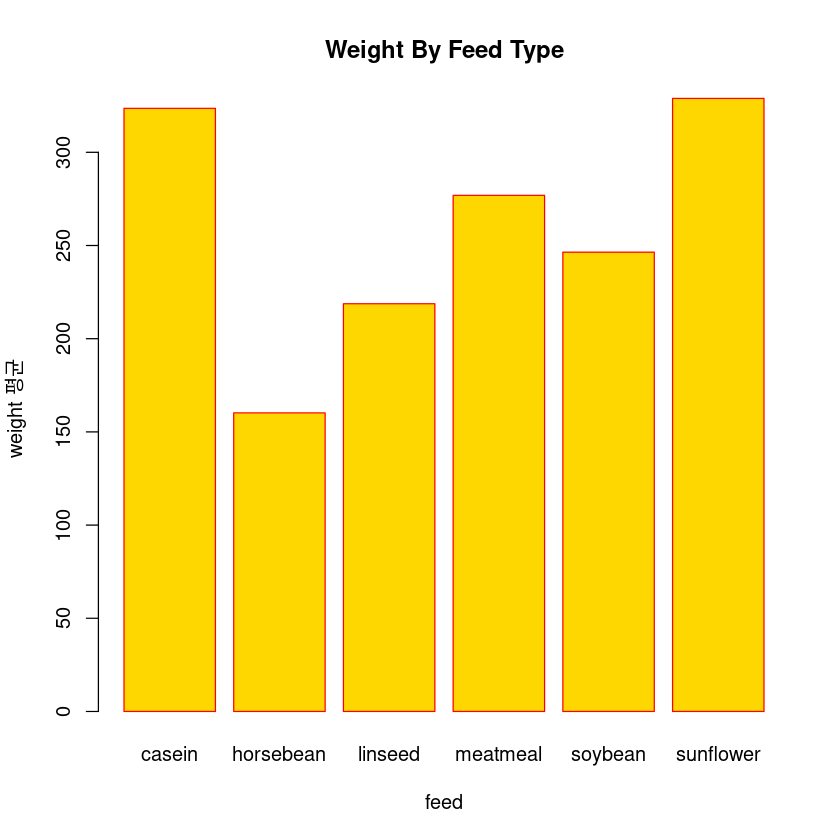

In [9]:
barplot(result, main = "Weight By Feed Type", xlab = "feed", ylab = "weight 평균", col = "gold", border = "red")

<hr>
<h4>9. . ggplot을 이용하여 막대그래프(geom_bar)를 그리는 코드 작성. 막대의 색상은 gold, 막
대의 테두리 색상은 red</h4>

In [10]:
library(doBy)

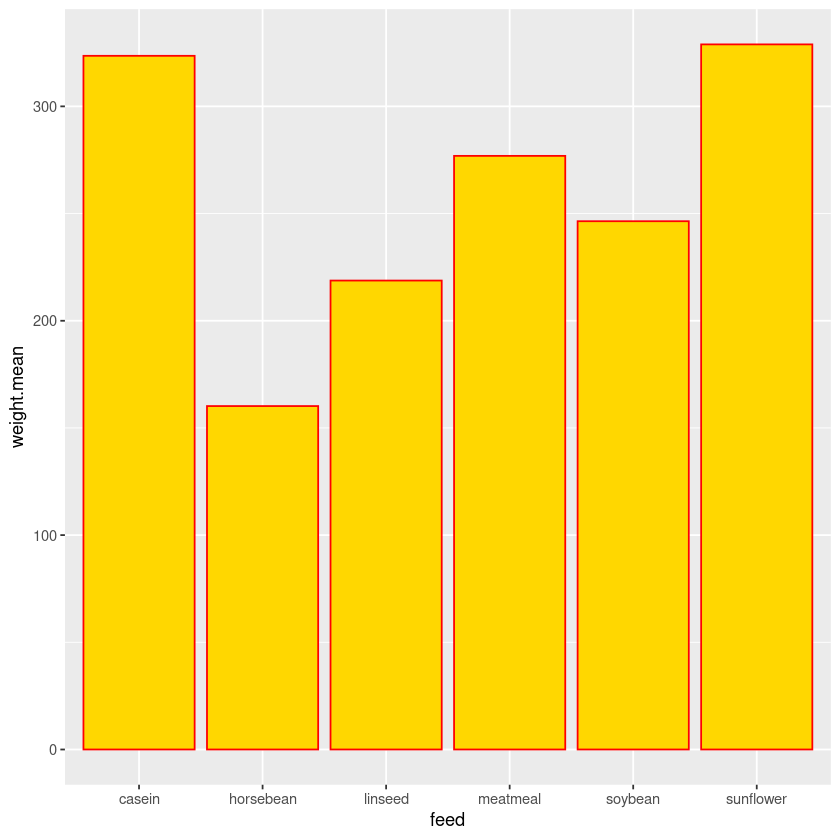

In [11]:
tbl <- summaryBy(weight~feed, data = chickwts, FUN = mean)

p <- ggplot(tbl, aes(feed, weight.mean))
p + geom_bar(stat='identity', fill = 'gold', color = 'red')

<hr>
<h4>10. 데이터프레임 chickwts의 변수 weight에 대하여 아래와 같이 계급의 크기를 50일 때의
빈도를 구하는 코드 작성</h4>

In [12]:
bins <- c(2:9) * 50
data <- table(cut(chickwts$weight, breaks = bins))
data             


(100,150] (150,200] (200,250] (250,300] (300,350] (350,400] (400,450] 
        7        10        16        12        17         7         2 

<hr>
<h4>11.  아래 그림과 같이 변수 weight에 대하여 계급의 크기가 50인 히스토그램 출력하는 코드 작
성. 색상은 lightgreen, 테두리는 black</h4>

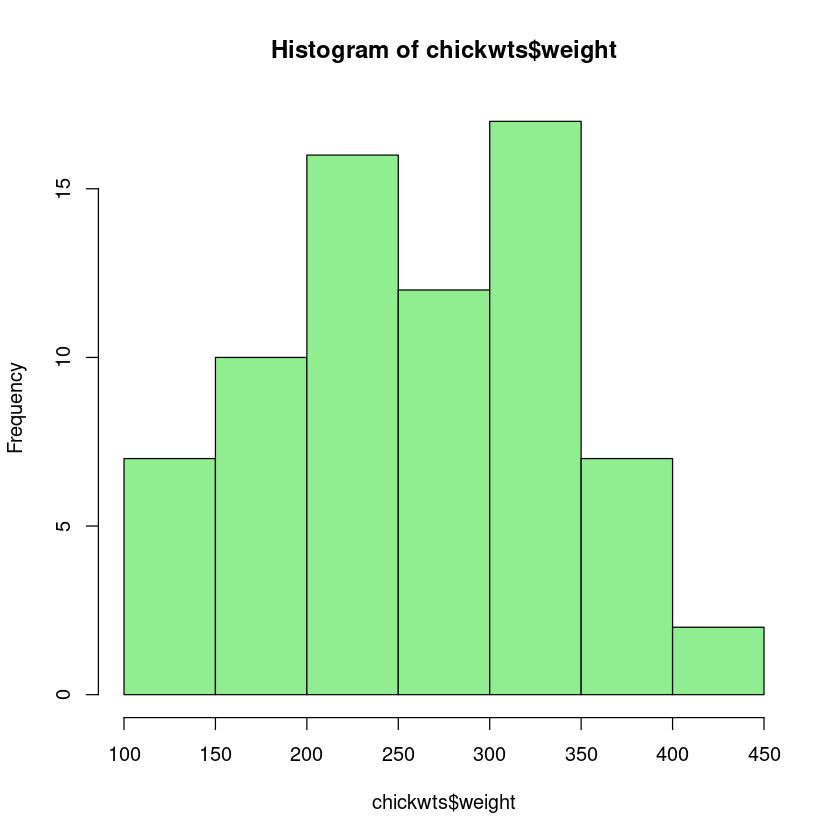

In [13]:
hist(chickwts$weight, breaks = bins, col = 'lightgreen', border = 'black')

<hr>
<h4>12.  ggplot을 이용하여 변수 weight에 대하여 계급의 크기가 50인 히스토그램 출력하는 코드
작성. 색상은 lightgreen, 테두리는 black</h4>

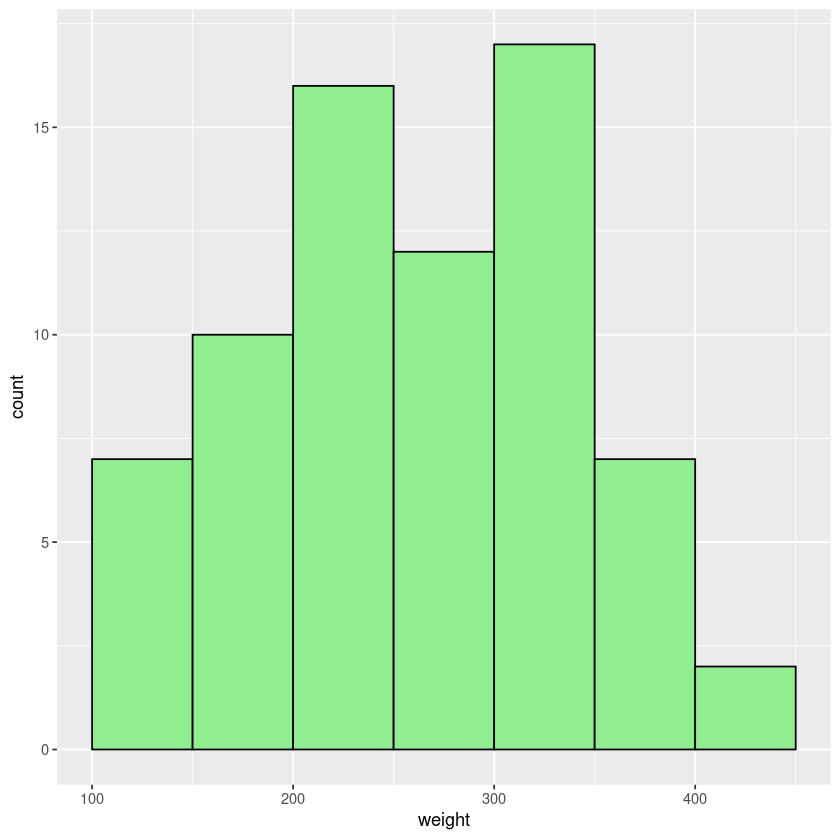

In [14]:
p <- ggplot(chickwts, aes(weight))
p <- p + geom_histogram(breaks = bins, fill = 'lightgreen', color = 'black')

p

<hr>
<h4>13. 변수 feed의 값에 따라 변수 weight의 상자그림을 아래와 같이 출력하는 코드 작성</h4>

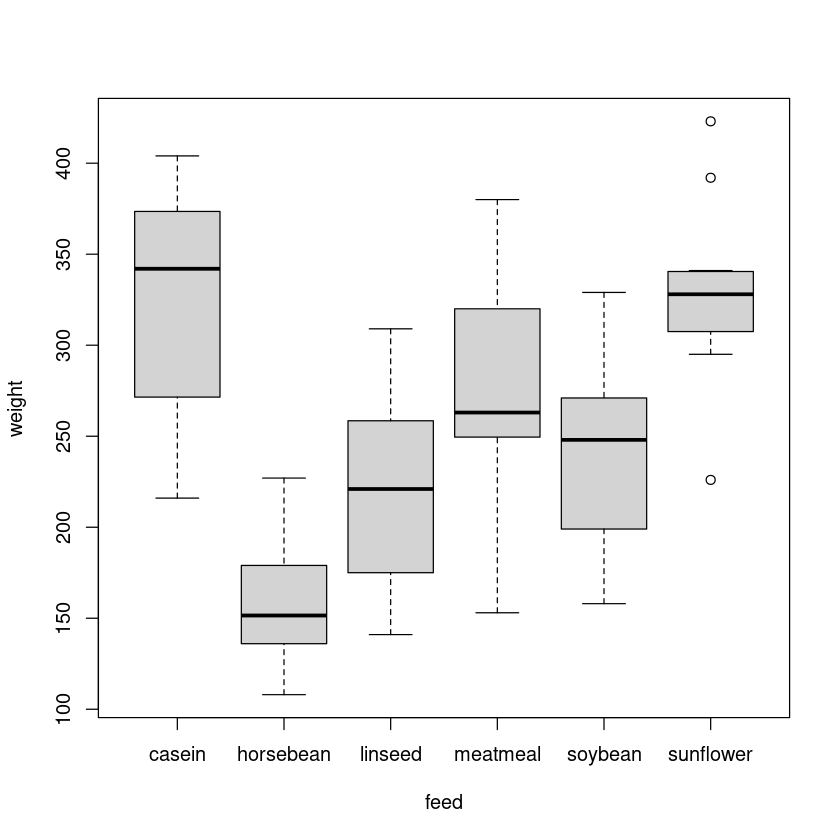

In [15]:
boxplot(weight ~ feed, data = chickwts)

<hr>
<h4>14. ggplot을 이용하여 변수 feed의 값에 따라 변수 weight의 상자그림을 아래와 같이 출력
하는 코드 작성. 색상은 feed 타입에 따라 다르게</h4>

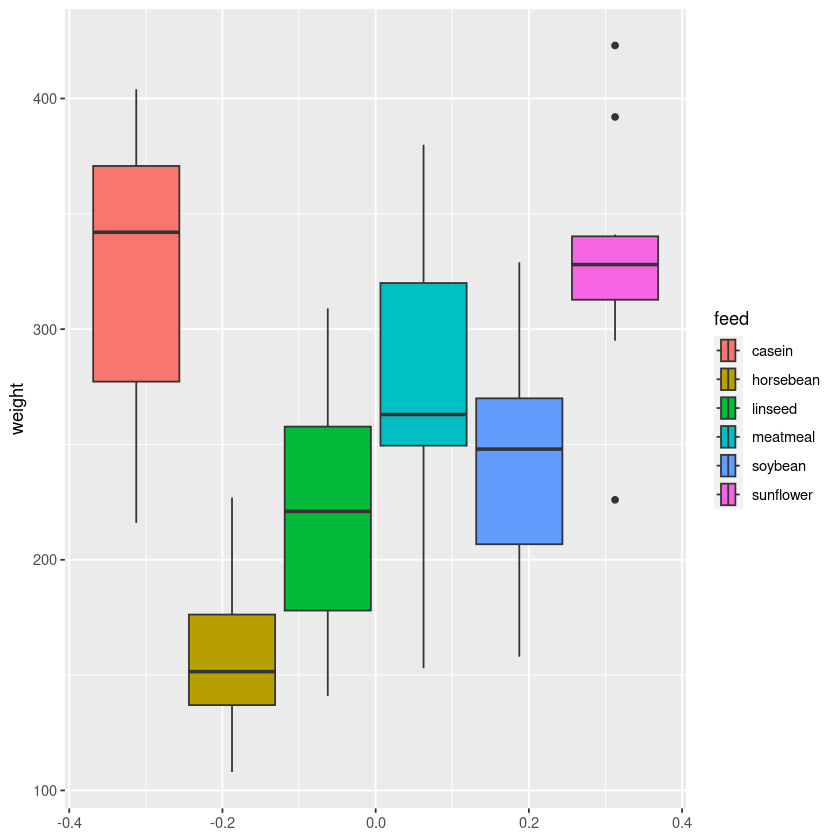

In [16]:
p <- ggplot(chickwts, aes(weight, fill = feed))
p <- p + geom_boxplot() + coord_flip()

p

<hr>
<h4>※ 데이터 “경기도 화성시_관광통계_20231025.csv”에 대하여 물음에 답하시오.</h4>

In [17]:
list.files()

[1] "202121059-정보경-무작정따라하기-6.ipynb"             
[2] "202121059-정보경-무작정따라하기-7.ipynb"             
[3] "202121059-정보경-exercise-6.ipynb"                   
[4] "2022년_도로교통공단_시군구별 월별 교통사고 통계.xlsx"
[5] "2022년_서울_일별평균대기오염도_2022.csv"             
[6] "경기도 화성시_관광통계_20231025.csv"                 
[7] "고속터미널-23-05.xlsx"                               
[8] "air_2021.xlsx"

In [18]:
data <- read.csv("경기도 화성시_관광통계_20231025.csv", fileEncoding="CP949")

data

번호,월,공룡알화석산지,국화도,우리꽃식물원,융건릉,향토박물관
<int>,<chr>,<int>,<int>,<int>,<int>,<int>
1,22-Jul,2906,4464,3927,20663,1672
2,22-Aug,3338,4427,4207,25409,161
3,22-Sep,7008,5421,7276,46993,1740
4,22-Oct,7554,4829,16492,60469,470
5,22-Nov,5433,2412,8652,39904,2597
6,22-Dec,3101,958,3449,12395,729
7,23-Jan,2516,1238,3500,13327,1397
8,23-Feb,4184,1579,6429,19692,1994
9,23-Mar,5765,3838,12620,29412,2088


<hr>
<h4>15.  저수준작도를 이용하여 다음 순서에 따라 그래프를 그리시오.</h4>

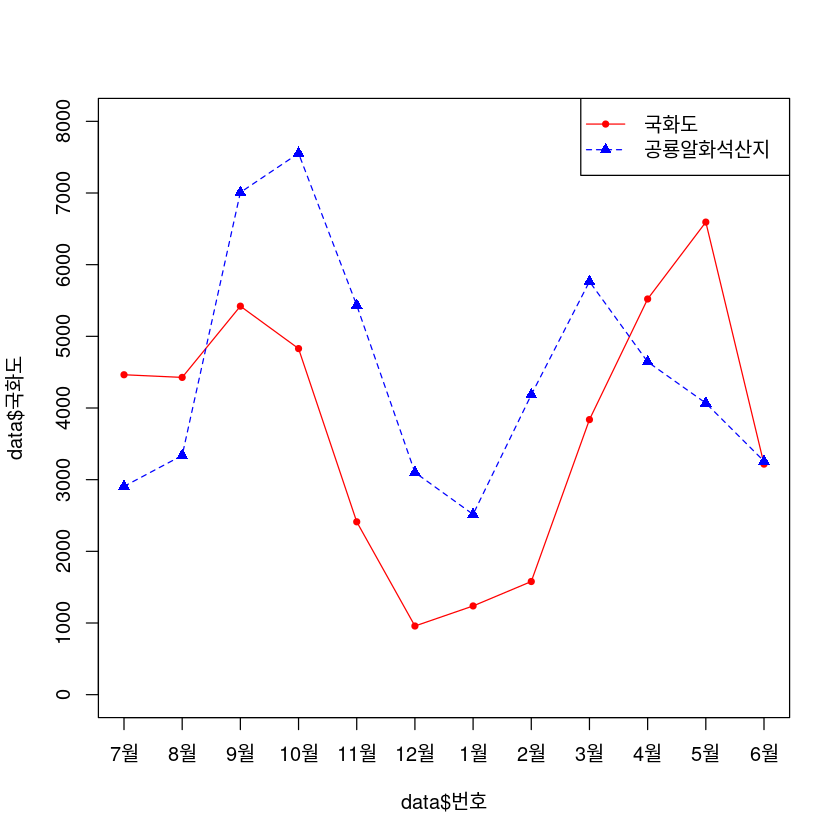

In [19]:
# a. x=번호, y=국화도에 대하여 pch=20, lty=1, col=axes=F 옵션을 이용하여 그래프를 그린다. y축의 범위는 0에서 8000까지
plot(data$번호, data$국화도, pch = 20, lty = 1, col = "red", axes = F, ylim = c(0, 8000), type = "o")

# b. x=번호, y=공룡알화석산지에 대하여 pch=17, lty=2, col=blue 옵션을 이용하여 그래프를 그린다.
points(data$번호, data$공룡알화석산지, pch = 17, lty = 2, col = "blue", type = "o")

# c. x축의 눈금은 7월 ,…, 12월, 1월, … 6월로 붙인다.
axis(side = 1, at = 1:12, labels = paste0(c(7:12, 1:6), "월"))

# d. y축의 눈금은 0부터 8000까지 1000단위로
axis(side = 2, at = seq(0,8000,1000), labels = seq(0,8000,1000))

# e. 범례를 topright에 붙인다.
legend("topright", legend = c("국화도", "공룡알화석산지"), lty = c(1, 2), col = c("red", "blue"), pch = c(20, 17))

box()

<hr>
<h4>16. ggplot를 이용하여 다음 그래프를 그리시오.</h4>

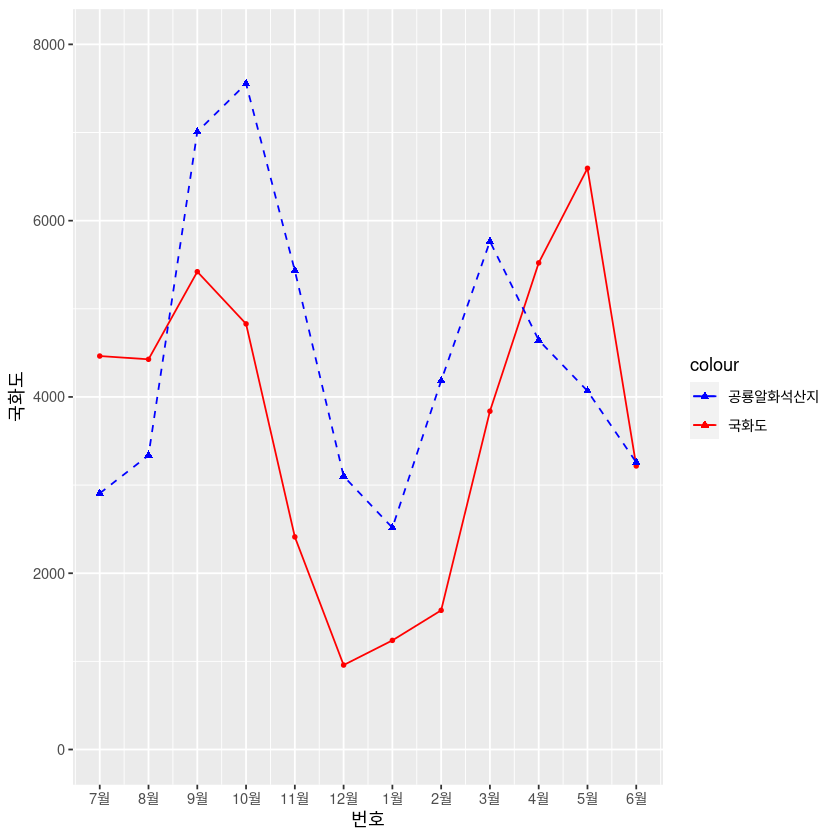

In [20]:
p <- ggplot(data, aes(x = 번호))

p <- p + geom_point(aes(y = 국화도, color =  "국화도"), shape = 20) 

p <- p + geom_line(aes(y = 국화도, color = "국화도"), linetype = 1)

p <- p + geom_point(aes(y = 공룡알화석산지, color = "공룡알화석산지"), shape = 17)

p <- p + geom_line(aes(y = 공룡알화석산지, color = "공룡알화석산지"), linetype = 2)

p <- p + scale_color_manual(labels = c(국화도 = "국화도", 공룡알화석산지 = "공룡알화석산지"),
                            values = c(국화도 = "red", 공룡알화석산지 = "blue")) 

p <- p + scale_x_continuous(labels = paste0(c(7:12, 1:6), "월"), breaks = c(1:12))
        

p <- p + ylim(c(0, 8000)) 

p

<hr>
<h4>※ 데이터 “air_2021.xlsx”에 대하여 물음에 답하시오.</h4>

In [21]:
list.files()

[1] "202121059-정보경-무작정따라하기-6.ipynb"             
[2] "202121059-정보경-무작정따라하기-7.ipynb"             
[3] "202121059-정보경-exercise-6.ipynb"                   
[4] "2022년_도로교통공단_시군구별 월별 교통사고 통계.xlsx"
[5] "2022년_서울_일별평균대기오염도_2022.csv"             
[6] "경기도 화성시_관광통계_20231025.csv"                 
[7] "고속터미널-23-05.xlsx"                               
[8] "air_2021.xlsx"

In [22]:
library(readxl)

In [23]:
air1 <- read_xlsx("air_2021.xlsx", sheet = 1)
air2 <- read_xlsx("air_2021.xlsx", sheet = 2)
air3 <- read_xlsx("air_2021.xlsx", sheet = 3)
air4 <- read_xlsx("air_2021.xlsx", sheet = 4)
air5 <- read_xlsx("air_2021.xlsx", sheet = 5)
air6 <- read_xlsx("air_2021.xlsx", sheet = 6)

air <- rbind(air1, air2, air3, air4, air5, air6)
str(air)

tibble [5,108,376 × 11] (S3: tbl_df/tbl/data.frame)
 $ prov    : chr [1:5108376] "강원" "강원" "강원" "강원" ...
 $ city    : chr [1:5108376] "강릉시" "강릉시" "강릉시" "강릉시" ...
 $ point   : chr [1:5108376] "옥천동" "옥천동" "옥천동" "옥천동" ...
 $ code    : num [1:5108376] 632132 632132 632132 632132 632132 ...
 $ datatime: POSIXct[1:5108376], format: "2021-01-01 01:00:00" "2021-01-01 02:00:00" ...
 $ SC2     : num [1:5108376] 0.003 0.003 0.003 0.003 0.003 0.003 0.005 0.004 0.003 0.003 ...
 $ PM10    : num [1:5108376] 21 16 19 19 18 16 14 14 17 13 ...
 $ O3      : num [1:5108376] 0.031 0.028 0.029 0.031 0.028 0.027 0.015 0.018 0.032 0.034 ...
 $ NO2     : num [1:5108376] 0.011 0.014 0.012 0.011 0.015 0.018 0.031 0.028 0.014 0.01 ...
 $ CO      : num [1:5108376] 0.3 0.4 0.3 0.3 0.3 0.3 0.4 0.4 0.3 0.3 ...
 $ PM25    : num [1:5108376] -999 -999 -999 -999 -999 -999 -999 -999 -999 -999 ...


<hr>
<h4>18. 패키기 dplyr을 이용하여 다음과 같이 data를 구성하고, 변수 ‘지역’의 빈도수를 출력
하는 코드</h4>

In [24]:
library(dplyr)


다음의 패키지를 부착합니다: ‘dplyr’


The following object is masked from ‘package:doBy’:

    order_by


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [25]:
# a. point가 ‘하’ 또는 ‘식’으로 시작하는 데이터만 추출
data <- filter(air, grepl("^하|^식", point))

# b. datatime 변수에서 월, 일, 시 변수로 분리(연도는 제외)
data <- mutate(data,
               월 = substr(datatime, 6, 7), 
               일 = substr(datatime, 9, 10), 
               시 = substr(datatime, 12, 13))

# c. 문자형 변수 월, 일, 시를 숫자로 바꾸어 다시 월, 일, 시로 저장
data <- mutate(data, 월 = as.numeric(월), 일 = as.numeric(일), 시 = as.numeric(시))

# d. prov, city, point를 합쳐서 새로운 변수 ‘지역’ 생성
data$지역 <- paste(data$prov, data$city, data$point)

# e. 5월 데이터만 추출
data <- filter(data, 월 == 5)

# f. 변수는 지역, 월, 일, 시, PM10만 포함
data <- select(data, 지역, 월, 일, 시, PM10)

table(data$지역)


경기 고양시 식사동 경남 하동군 하동읍 경북 경산시 하양읍 
               744                744                743 

<hr>
<h4>19.위 18번에서 생성한 data의 head와 tail 출력</h4>

In [26]:
head(data)

tail(data)

지역,월,일,시,PM10
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
경기 고양시 식사동,5,1,0,37
경기 고양시 식사동,5,1,1,31
경기 고양시 식사동,5,1,2,38
경기 고양시 식사동,5,1,3,37
경기 고양시 식사동,5,1,4,36
경기 고양시 식사동,5,1,5,34


지역,월,일,시,PM10
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
경북 경산시 하양읍,5,31,18,55
경북 경산시 하양읍,5,31,19,54
경북 경산시 하양읍,5,31,20,42
경북 경산시 하양읍,5,31,21,32
경북 경산시 하양읍,5,31,22,29
경북 경산시 하양읍,5,31,23,23


<hr>
<h4>20. data에는 -999가 포함되어 있는 자료가 있다. 이를 모두 NA로 대체하고, NA가 있는지
확인하는 코드 </h4>

In [27]:
data[data == -999] <- NA

any(is.na(data))

[1] TRUE

<hr>
<h4>21.group_by(), summarise()를 이용하여 지역별 일별 PM10의 평균을 구하고 그 결과를
result에 저장하고 tail을 출력하는 코드</h4>

In [28]:
result <- group_by(data, 지역, 일)
result <- summarise(result, PM10 = mean(PM10))

tail(result)

`summarise()` has grouped output by '지역'. You can override using the
`.groups` argument.


지역,일,PM10
<chr>,<dbl>,<dbl>
경북 경산시 하양읍,26,43.79167
경북 경산시 하양읍,27,28.37500
경북 경산시 하양읍,28,30.12500
경북 경산시 하양읍,29,29.08333
경북 경산시 하양읍,30,31.54167
경북 경산시 하양읍,31,39.00000


<hr>
<h4>22. 위 21번의 결과를 아래와 같이 ggplot을 이용하여 그래프를 출력하는 코드</h4>

Warning message:
“Removed 8 rows containing missing values (`geom_point()`).”


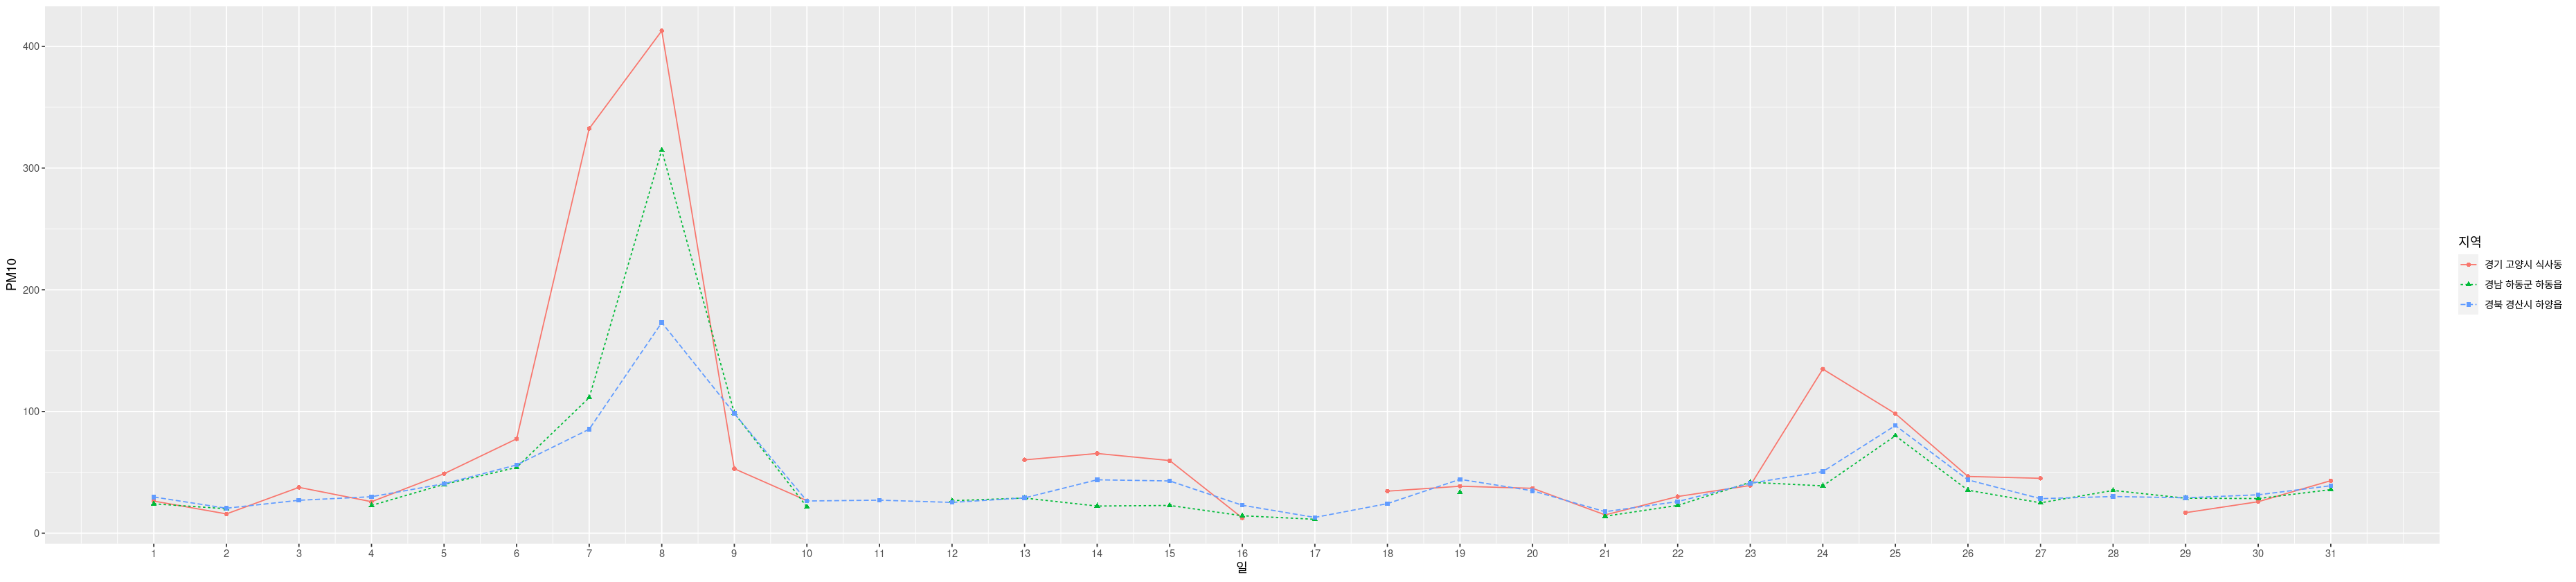

In [29]:
library(ggplot2)

options(repr.plot.width = 31)

# a. color를 지역으로 지정
p <- ggplot(result, aes(일, PM10, color = 지역))

# b. 선 추가. linetype=지역으로 지정
p <- p +  geom_line(aes(linetype = 지역))

# c. 점 추가: shape=지역으로 지정
p <- p + geom_point(aes(shape = 지역))

# d. x축의 눈금을 1부터 31로 지정
p <- p + scale_x_continuous(breaks = 1:31)

p

<hr>
<h4>23. 데이터 “고속터미널-23-05.xlsx”을 읽고 다음과 같이 산점도를 그리시오.</h4>

In [30]:
list.files()

[1] "202121059-정보경-무작정따라하기-6.ipynb"             
[2] "202121059-정보경-무작정따라하기-7.ipynb"             
[3] "202121059-정보경-exercise-6.ipynb"                   
[4] "2022년_도로교통공단_시군구별 월별 교통사고 통계.xlsx"
[5] "2022년_서울_일별평균대기오염도_2022.csv"             
[6] "경기도 화성시_관광통계_20231025.csv"                 
[7] "고속터미널-23-05.xlsx"                               
[8] "air_2021.xlsx"

In [31]:
library(readxl)

In [32]:
data <- read_xlsx("고속터미널-23-05.xlsx")

data

date,line,stn,ride,alight
<chr>,<chr>,<chr>,<dbl>,<dbl>
20230501,3호선,고속터미널,53496,47096
20230501,7호선,고속터미널,16634,10665
20230501,9호선,고속터미널,15301,20410
20230502,3호선,고속터미널,43703,40823
20230502,7호선,고속터미널,17427,15025
20230502,9호선,고속터미널,14747,18689
20230503,3호선,고속터미널,45067,42741
20230503,7호선,고속터미널,17243,15425
20230503,9호선,고속터미널,15155,19768


In [33]:
data <- mutate(data, 일 = substr(date,7,8))

data <- mutate(data, 일 = as.numeric(일))

data

date,line,stn,ride,alight,일
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
20230501,3호선,고속터미널,53496,47096,1
20230501,7호선,고속터미널,16634,10665,1
20230501,9호선,고속터미널,15301,20410,1
20230502,3호선,고속터미널,43703,40823,2
20230502,7호선,고속터미널,17427,15025,2
20230502,9호선,고속터미널,14747,18689,2
20230503,3호선,고속터미널,45067,42741,3
20230503,7호선,고속터미널,17243,15425,3
20230503,9호선,고속터미널,15155,19768,3


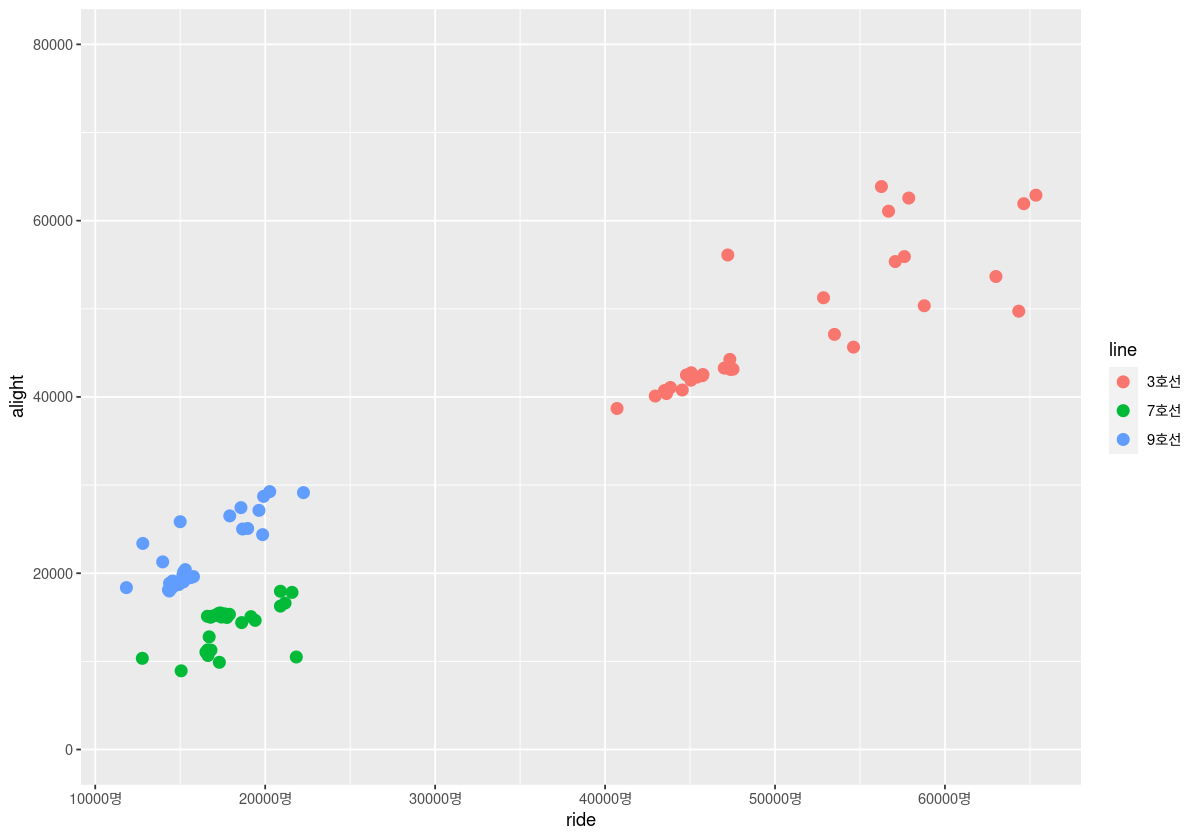

In [34]:
library(ggplot2)
options(repr.plot.width = 10)

p <- ggplot(data, aes(ride, alight, color = line))

p <- p + geom_point(size = 3)

p <- p + ylim(c(0,80000))
        
p <- p + scale_x_continuous(breaks = seq(0,80000,10000), labels = paste0(seq(0,80000,10000), "명"))

p